In [1]:
import datastory_plots as dsp
df_airports, df_flights = dsp.load_data("data/preprocessed/airports.csv", "data/preprocessed/flights_100mb.csv")

# DataStory - Airplane Hubs

## Abstract
Kurze zusammenfassung - was habt ihr untersucht, was habt ihr gefunden.

Die DataStory "Airplane Hubs" beinhaltet die Anyalyse des Luftverkehrs von Flugverbindungen vom Monat Mai sowie September 2021 über zentrale Verkehrsknoten im Luftverkehrsnetz weltweit. 

Die Flugrohdaten werden auf Distanz (km), Region und Destinationen aufbereitet und gefiltert. Im Anschluss werden Fragen zu Anzahl Verbindungen, Flugverkehraufkommen, längste Distanzen und zeitlichen Differenzen behandelt und untersucht.

Aus den Resultaten geht hervor, dass die USA generell einen viel höheren Flugbetrieb, als andere Staaten aufweist. Die erhobenen Knotenpunkte wie Chicago, Amsterdam, Dubai, Hong-Kong oder Sydney reflektieren auf der Karte ein höheres Aufkommen bei Grossstädten am Äquator. 

Distanz
Unterschied

## Introduction
Gebt hier etwas Kontext zum Datensatz und zur Frage die ihr untersucht. Warum sind die Fragen interessant/relevant? Was für Erkenntnisse zum Datensatz sind bereits bekannt? Wie stehen eure Fragen dazu im Kontrast?

AirplaneHubs entstand aus der Idee, CO-2 Emissionen von Flugverbindungen zu berechenen. Aufgrund der komplexen Berechnung der Emission und deren benötigten Informationen, wurden wir gezungen umzugestalten. In Anbetracht der vorliegenden Datensammlung, entschieden wir uns globale Verkehrsknotenpunkte zu untersuchen.<br><br>

Die Analyse von Verkehrknotenpunkte ist interessant aus dem Grund, dass es ein gewisses Schaubild eines CO2-Emissionwert repräsentiert aufgrund der Anzahl Flugverbindungen. Die anschliessende Frage der Distanzen hilft erneut Aufschluss über die Verkehrknotenpunkte zu zeigen und so weltweite Flugverkehrslinien aufzuzeigen. Desweiteren stellten wir uns die Frage, inwiesehr sich die Daten in zeitlichen Intervall unterscheiden. Ändern sich Knotenpunkte? Sind Feriendestinationen als Verkehrknoten sichtbar? Gab es öfters längere Flüge im Frühling oder nach den ersten Lockdowns im September? 
<br>
Schnell zu erkennen sind die grossen regionalen Unterschiede der Anzahl gesammelter Verbindungen (nicht alle Fluggesselschaften können gesammelt werden). Dies führt uns zum Schluss, dass wir zwingend Flughäfen in Ihrer Region unterscheiden, um repräsentative Daten zur Behandlung der Verkehrsknoten zu erhalten. Mit dieser Differenzierung können wir die Anzahl Flugverbindungen zum Verhältnis zu dessen regionalität bringen. Damit nicht ausschlieslich die Anzahl Verbindungen in relation gebracht wird, werden die Ziele der jeweiligen Flüge berücksichtigt. Dies schliesst aus, das Flughäfen mit weniger Zielvielfalt und somit als Verkehrsknotenpunkt ausgeschlossen werden kann. 

### Daten: 
Anzahl Flughäfen: 13'819<br>
Anzahl Flüge: 3'113'109 (nicht komprimierte Version)

## Results
Beschreibt hier die Daten und die Zusammenhänge die ihr untersucht und findet. Beschränkt euch hier auf 5 Plots.

### Flugverbindungen
Flughafen welche keine Verbindungen aufweisen wie Helikopterflugplätze, sind für kommende Analysen gefiltert. Ebenso Flugverbindungen bei denen Destination oder Abflugort unbekannt sind. Nach der Filtertung behandlen wir 13'819 Flughäfen weltweit mit rund 3 Millionen Flugverbindungen. Diese nach Regionen aufgeteilt ergibt folgende Visualisierung:

[Text(0.5, 1.0, 'Flugverkehr nach Region'),
 Text(0.5, 0, 'Anzahl Flugverbindungen'),
 Text(0, 0.5, 'Regionen')]

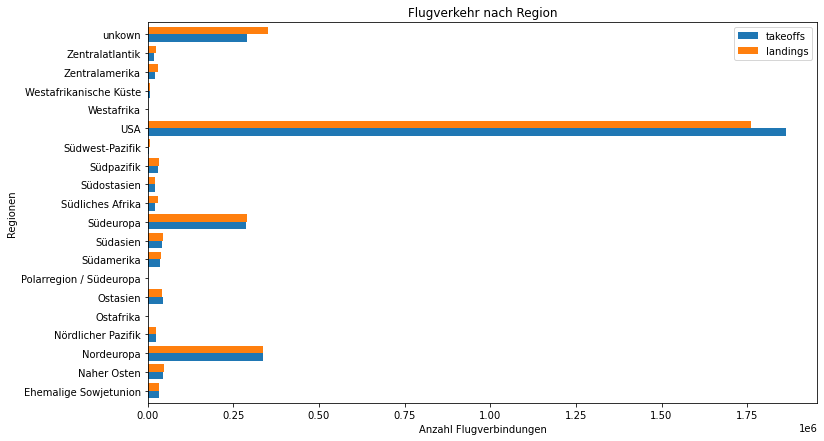

In [2]:
dsp.flight_connections(df_airports)

Der Unterschied zwischen der USA zu anderen Regionen ist sehr gross. Um Knotenpunkte auf der Welt zu identifizieren, müssen Flughäfen in ihrer Region zwingend unterschieden werden. Ansonsten sind ausschliesslich Flughäfen der USA wegen des hohen Flugverkehrs Knotenpunkte.
<br>
Um ein Gefühl der Daten zu bekommen zeigen wir folgendes Histogramm mit Mittelwert und Standardabweichung. 

Mittelwert Mai:		42595.29       Mittelwert Sep.:		49736.77
Standardabweichung Mai:	3133.04       Standardabweichung Sep.:	3286.19


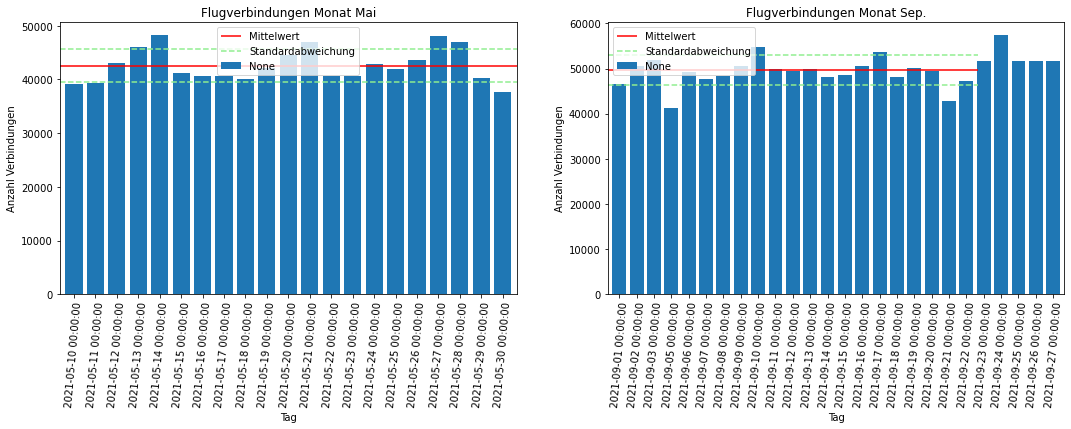

In [3]:
fig, m1, m2, s1, s2 = dsp.show_stats(df_flights)
print("Mittelwert Mai:\t\t"+str(round(m1,2))+"       Mittelwert Sep.:\t\t"+str(round(m2,2)))
print("Standardabweichung Mai:\t"+str(round(s1,2))+"       Standardabweichung Sep.:\t"+str(round(s2,2)))

Um nun Knotenpunkte zu identifizieren sind zusätzlich der Anzahl Flugverbindungen die Anzahl unterschiedlicher Destinationen interessant. Ein Knotenpunkt weist mehrere unterschiedliche Ziele auf. Neu unter Berücksichtigung der Anzahl Flugverbindungen und deren Anzahl  Destinationen, kommen wir auf eine besser verteilte Visualisierung der Knotenpunkte:

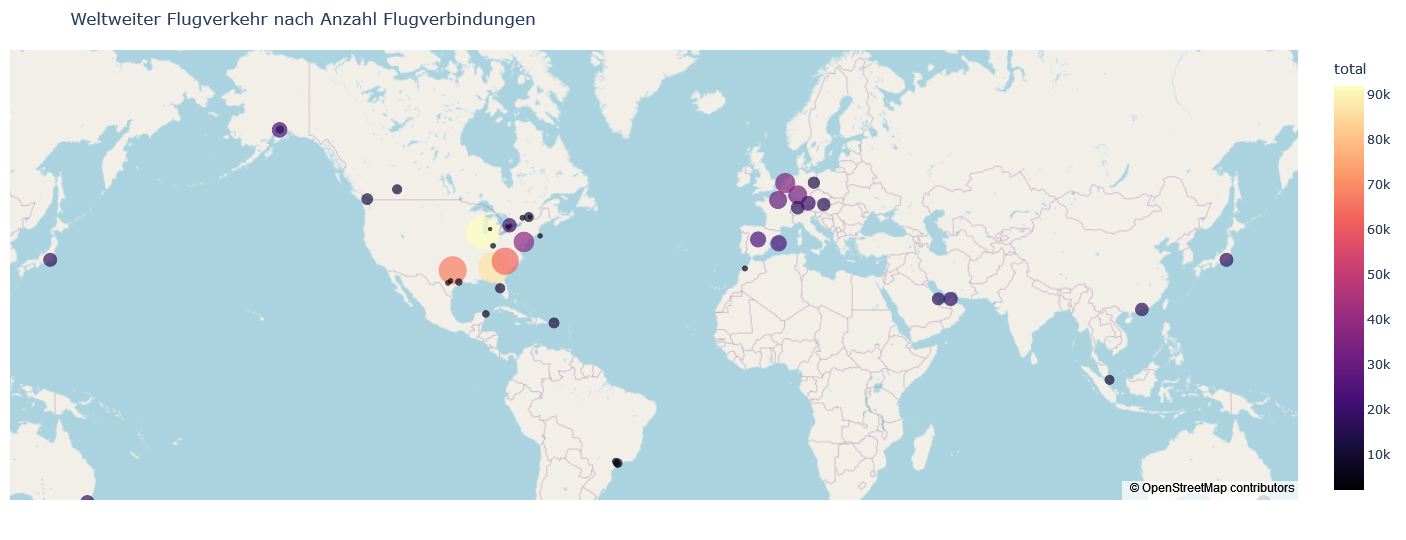

In [4]:
dsp.traffic_map_total_destinations(df_airports, 0.993)

Bis auf kleine unregelmässigkeiten von Kleinflughäfen welche keiner Region zugeordnet werden konnten, spiegelt die Visualisierung unsere Erwartungen wieder. Bis auf Flughäfen wie Mallorca und Alaska ist zu erkennen, dass Grossstädte vorallem vertreten sind. Deutlicher Unterschied ist auch in der Anzahl Verbindungen zu sehen wie bereits diskutiert. 

## Distanzen von Flugverbindungen


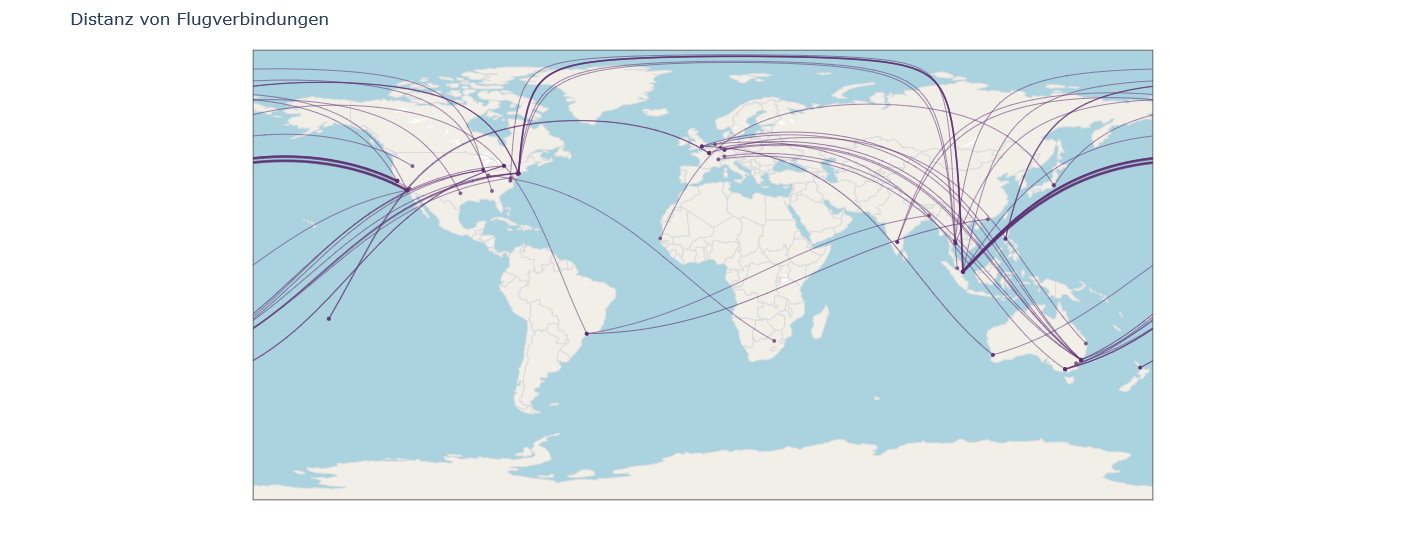

In [5]:
dsp.map_longest_flight_distances(df_airports, df_flights)

Die längsten Flugdistanzen liegen im Bereich > 17'500 km, was rund dem halben Erdumfang (37'422 km) entspricht. Damit ein Verkehrsknotenpunkt Kontinente miteinander verknüpft, sind oft grosse Distanzen wie der Pazifik oder der Atlantik zu überwinden. Interessant ist dass fast alle dieser längsten Flugdistanzen aus den obigen top Flughäfen stammen. Die längste zurückgelegte Distanz ist von Sao Paulo nach Tokyo, mit rund 18'490 km. Dies sind beides grosse Internationale Flughäfen. 

Unterscheiden wir im Datenset die Flughäfen erneut anhand langen Flugdistanzen, ergibt das nachfolgende Visualisierung. Wie in 'DataStory_AirplaneHubs' zu sehen ist, gibt es auch zahlreiche kleine Flughäfen die grosse Distanzen aufweisen. Da wir grosse Flughäfen untersuchen, kann für eine noch bessere Filterung anhand dem Typ des Flughafens durchgeführt werden. Wir beschränken uns auf qualitative Variablen zur Filterung. Eine solche Visualisierung kann im File "Appendix" entnommen werden. 

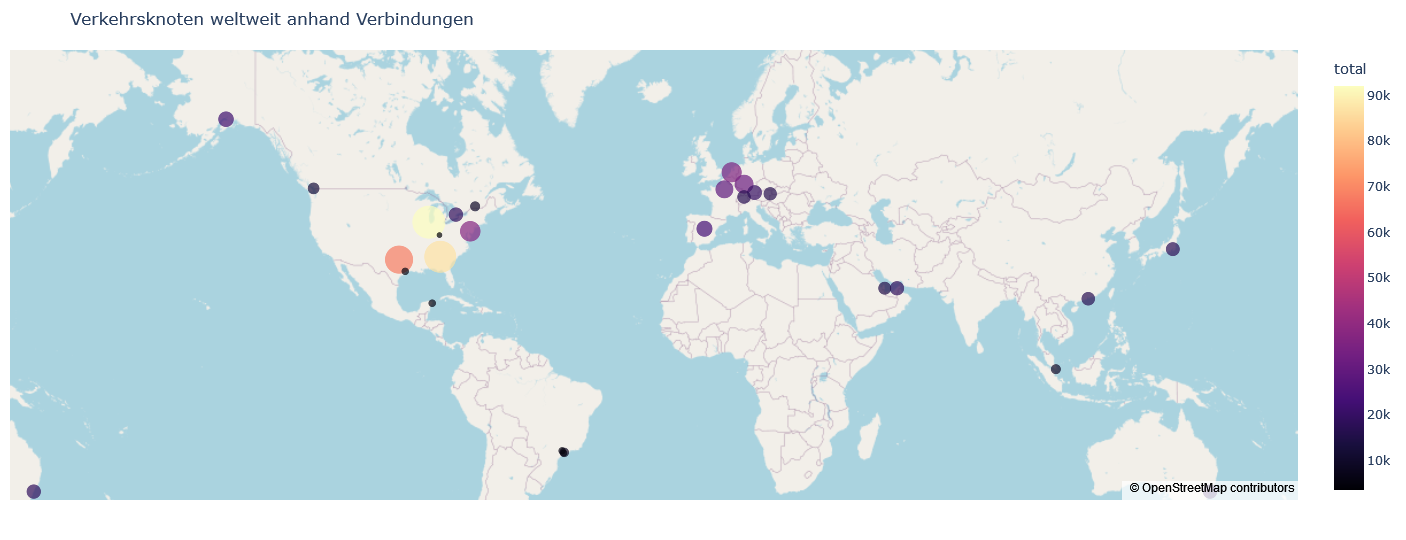

In [6]:
dsp.traffic_map_total_destinations_distance(df_airports, df_flights, 0.993)

Es ist ersichtlich, dass die erneute Filterung anhand der Distanz kleine Flughafen aussortiert. Zur Behandlung der saisonalen Unterschiede, sind keine grossen Differenzen in Hinsicht Verkehrsknoten oder Distanz sichtbar weshalb wir uns hier auf die Verkehrsknoten konzentrieren. Eine Untersuchung der saiosonalen Unterschiede sind im Descritive_Stats sowie Appendix aufgezeigt. 

## Conclusion
Mit Abstand am meisten Flugverkehr weist der internationale Airport von Chicaco auf, welcher nach kurzer Wikipedia-Recherche weltweit auch am meisten Flugverkehr im 2021 darstellt. In Europa sind bis auf Mallorca die wohl bekanntesten, grössten Flughäfen vertreten mit: London, Paris, Frankfurt und Amsterdam. Das Mallorca als Knotenpunkt identifiziert wurde, liegt höchstwarscheinlich wegen der Ferienzeit.
<br>
Die Visualisierung spiegelt unsere Erwartungen wieder, welche die grössten und wichtigsten Flughäfen darstellt wie Doha, Dubai, Sydney, Tokio, Hong-Kong etc. welche nahe am Äquator liegen und infolge einen wichtiger Standort im Flugverkehrnetz darstellt. <br><br> Spannend sind die Grossstädte, welche nicht auf der Karte markiert sind. Das sind beispielsweise Instanbul oder Neu Dehli. Ausgehend der Grösse des Flughafens sind es sehrwohl Knadidaten für Knotenpunkte. Enttäuschend sind die fehlenden Knotenpunkte in Südamerika - bis auf Soa Paolo konnten keine weiteren Flughafen als Knotenpunkt identifiziert werden.

Was könnte man noch weiter tun?
Wie zu Beginn angedacht, wäre die Analyse spannend in Kombination mit einer CO2-Emissionsberechnung. Wären Daten zu Start- & Landeemission, Passagieranzahl sowie Verbrauch vorhanden respk. auffindbar könnten wir das unterschiedliche Flugverhalten mit deren Emissionen aufzeigen. Zusammengefasst könnten wir Monate mit kaum Passagieren in Kontrast zu Monaten mit viel Passagieren stellen und den Unterschied aufzeigen. Wie viel Emissionen gibt ein Flugzeug ohne Passagiere frei? Oder welche Monate weisen höhere Emissionen als andere auf? 